Sentiment Analysis on restaurant
reviews using 

*   SVM and PCA
*   Naive Bayes

*   Random Forest Classification 

### **What is sentiment analysis (opinion mining)?**
Sentiment analysis, also referred to as opinion mining, is an approach to natural language processing (NLP) that identifies the emotional tone behind a body of text. This is a popular way for organizations to determine and categorize opinions about a product, service, or idea. It involves the use of data mining, machine learning (ML) and artificial intelligence (AI) to mine text for sentiment and subjective information.

Sentiment analysis systems help organizations gather insights from unorganized and unstructured text that comes from online sources such as emails, blog posts, support tickets, web chats, social media channels, forums and comments. Algorithms replace manual data processing by implementing rule-based, automatic or hybrid methods. Rule-based systems perform sentiment analysis based on predefined, lexicon-based rules while automatic systems learn from data with machine learning techniques. A hybrid sentiment analysis combines both approaches.

### **Twitter sentiment analysis**
Twitter sentiment analysis allows you to keep track of what's being said about your product or service on social media, and can help you detect angry customers or negative mentions before they they escalate.

## **Importing Library**

In [52]:
import nltk
nltk.download('wordnet')
import pandas as pd
import re
import string
from nltk.stem import WordNetLemmatizer 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.stem import WordNetLemmatizer 
  


%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [36]:
dataset = pd.read_csv('resto.csv',delimiter = '\t',quoting=3)
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


### **Data Visualization**

In [33]:
dataset.shape

(1000, 2)

In [4]:
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [34]:
dataset.dtypes

Review    object
Liked      int64
dtype: object

In [5]:
dataset.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [6]:
dataset['Liked'].isnull().values.any()

False

In [7]:
dataset['Review'].isnull().values.any()

False

# **Reviews Analysis**

### **Dividing into Positive and Negative Reviews**

In [37]:
print("The number of Positive reviews=", (dataset["Liked"]==1).sum())
print("The number of Negative reviews=", (dataset["Liked"]==0).sum())

The number of Positive reviews= 500
The number of Negative reviews= 500


In [38]:
pos_rev=" "
neg_rev=" "

In [39]:
len(dataset)

1000

In [40]:
for i in range(0,1000):
    if dataset["Liked"][i]==1:
        pos_rev=pos_rev+" "+dataset["Review"][i]
    if dataset["Liked"][i]==0:
        neg_rev=neg_rev+" "+dataset["Review"][i]   

In [41]:
print("Length of positive reviews-",len(pos_rev))
print("")
print("Part of positive reviews-")
print(pos_rev[1000:2000])

Length of positive reviews- 28441

Part of positive reviews-
 service. The only thing I did like was the prime rib and dessert section. The burger is good beef, cooked just right. If you want a sandwich just go to any Firehouse!!!!! My side Greek salad with the Greek dressing was so tasty, and the pita and hummus was very refreshing. We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside. He came running after us when he realized my husband had left his sunglasses on the table. Their chow mein is so good! The portion was huge! Loved it...friendly servers, great food, wonderful and imaginative menu. The salad had just the right amount of sauce to not over power the scallop, which was perfectly cooked. This place receives stars for their APPETIZERS!!! The cocktails are all handmade and delicious. We'd definitely go back here again. We are so glad we found this place. Great food and service, huge portions and they give a military discount. Always

In [42]:
print("Length of negative reviews-",len(neg_rev))
print("")
print("Part of negative reviews-")
print(neg_rev[1000:2000])

Length of negative reviews- 30876

Part of negative reviews-
ce, the waiter made me feel like I was stupid every time he came to the table. Service sucks. There is not a deal good enough that would drag me into that establishment again. Hard to judge whether these sides were good because we were grossed out by the melted styrofoam and didn't want to eat it for fear of getting sick. Frozen pucks of disgust, with some of the worst people behind the register. It's too bad the food is so damn generic. They have horrible attitudes towards customers, and talk down to each one when customers don't enjoy their food. The Heart Attack Grill in downtown Vegas is an absolutely flat-lined excuse for a restaurant. Not much seafood and like 5 strings of pasta at the bottom. The ripped banana was not only ripped, but petrified and tasteless. At least think to refill my water before I struggle to wave you over for 10 minutes. We got the food and apparently they have never heard of salt and the batter o

## **Positive Reviews**

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
#removing the punctuations

text_nopunct_pos=''

text_nopunct_pos= "".join([char for char in pos_rev if char not in string.punctuation])

In [45]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [46]:
#Tokenizing the text
pos_tokens = tokenizer.tokenize(text_nopunct_pos)
len(pos_tokens)

5118

In [47]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words_pos = []

# Looping through the tokens and make them lower case
for word in pos_tokens:
    words_pos.append(word.lower())

In [48]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.

stopwords = nltk.corpus.stopwords.words('english')

In [49]:
final_words_pos=[]

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for word in words_pos:
    if word not in stopwords:
        final_words_pos.append(word)

In [50]:
wn = WordNetLemmatizer() 

In [53]:
lem_words_pos=[]

for word in final_words_pos:
    word=wn.lemmatize(word)
    lem_words_pos.append(word)

In [54]:
#The frequency distribution of the words
freq_dist_pos = nltk.FreqDist(lem_words_pos)

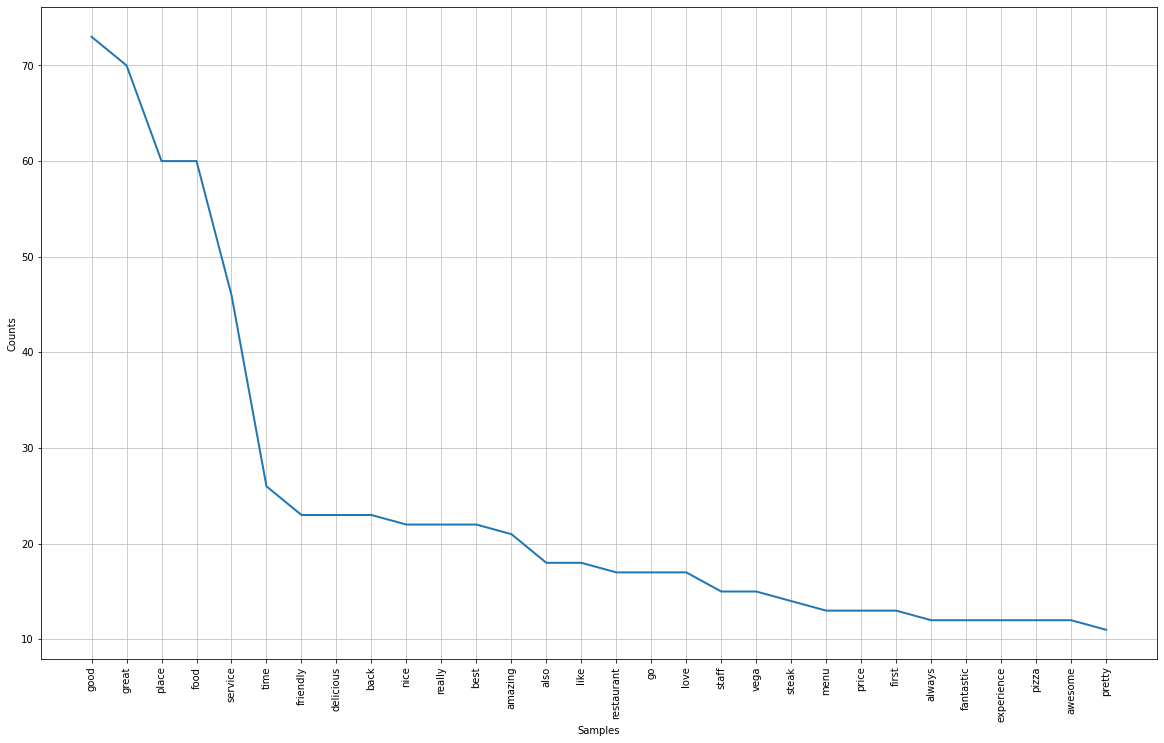

In [55]:
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist_pos.plot(30)

In [56]:
#converting into string

res_pos=' '.join([i for i in lem_words_pos if not i.isdigit()])

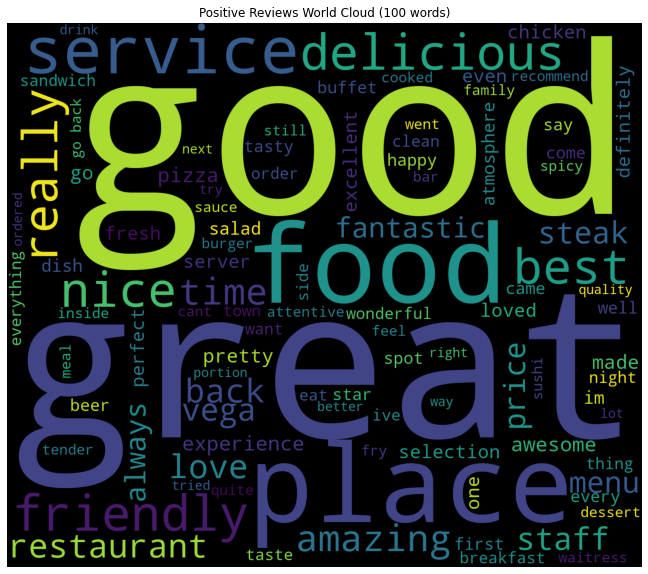

In [57]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res_pos)


plt.imshow(wordcloud)
plt.title('Positive Reviews World Cloud (100 words)')
plt.axis('off')
plt.show()

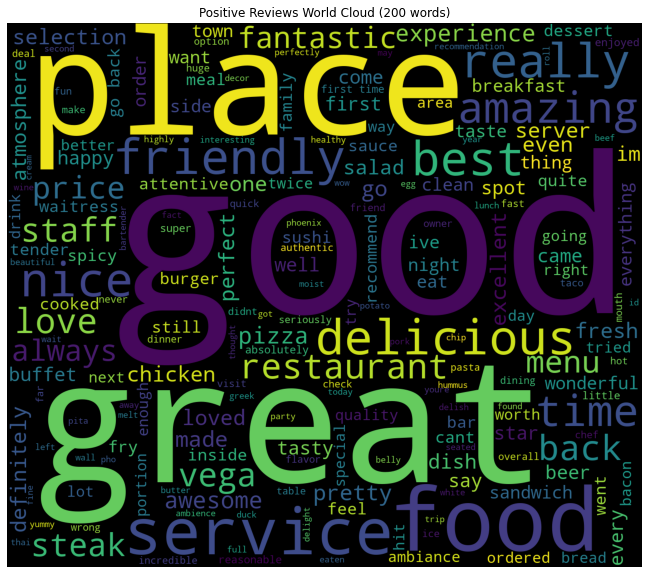

In [58]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res_pos)


plt.imshow(wordcloud)
plt.title('Positive Reviews World Cloud (200 words)')
plt.axis('off')
plt.show()

The wordcloud makes it clear which words 
are more common.

As usual, positive words are in abundant.

Great and good seem to be the largest most abundant words.

## **Negative reviews**

In [59]:
text_nopunct_neg=''

text_nopunct_neg= "".join([char for char in neg_rev if char not in string.punctuation])

In [60]:
#Tokenizing the text
neg_tokens = tokenizer.tokenize(text_nopunct_neg)
len(neg_tokens)

5729

In [61]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words_neg = []

# Looping through the tokens and make them lower case
for word in neg_tokens:
    words_neg.append(word.lower())

In [62]:
final_words_neg=[]

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for word in words_neg:
    if word not in stopwords:
        final_words_neg.append(word)

In [63]:
lem_words_neg=[]

for word in final_words_neg:
    word=wn.lemmatize(word)
    lem_words_neg.append(word)

In [64]:
#The frequency distribution of the words
freq_dist_neg = nltk.FreqDist(lem_words_neg)

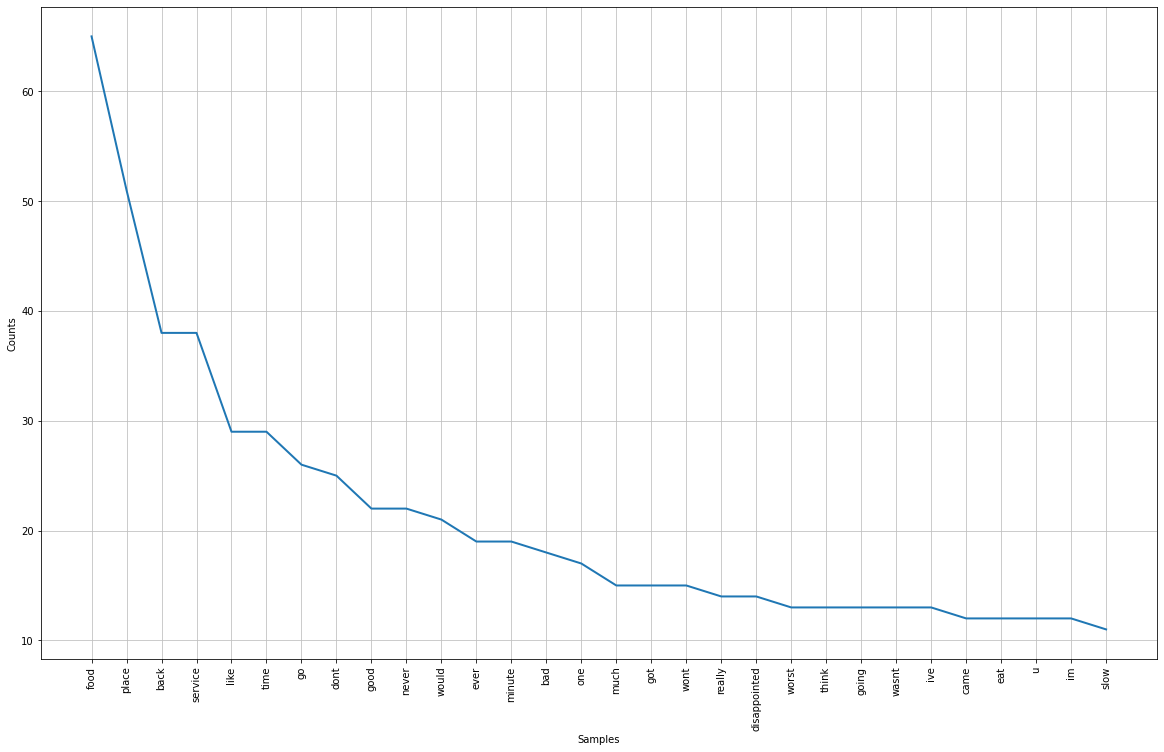

In [65]:
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist_neg.plot(30)

In [67]:
#converting into string

res_neg=' '.join([i for i in lem_words_neg if not i.isdigit()])

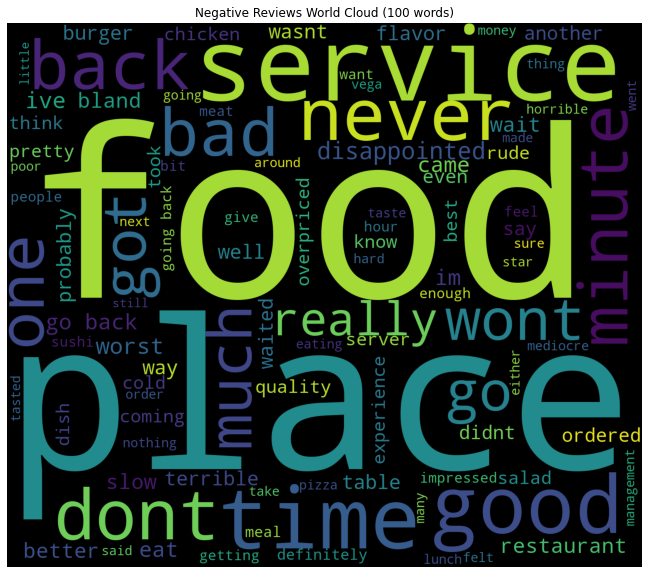

In [68]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res_neg)


plt.imshow(wordcloud)
plt.title('Negative Reviews World Cloud (100 words)')
plt.axis('off')
plt.show()

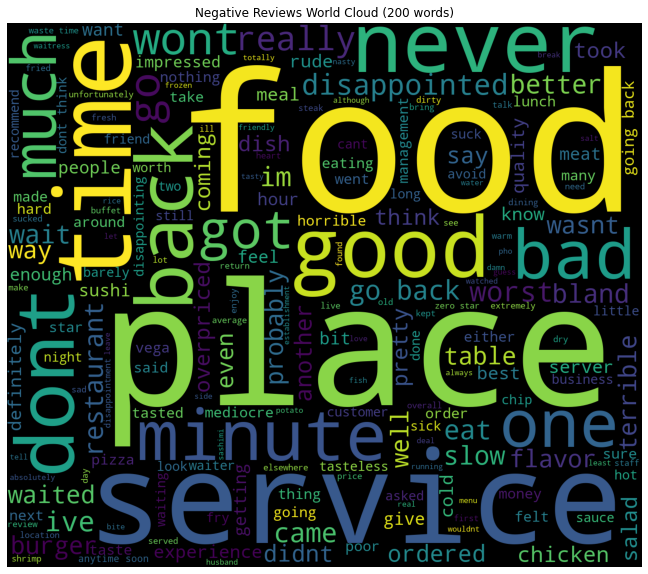

In [69]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res_neg)


plt.imshow(wordcloud)
plt.title('Negative Reviews World Cloud (200 words)')
plt.axis('off')
plt.show()

The word cloud makes it clear why these reviews fall under negative reviews.

Words which might be used in a complain are used here.

# **End of Reviews Analysis**

### **Stopwords-**
In computing, stop words are words which are filtered out before or after processing of natural language data (text). eg- the, this, are , is etc

### **Lemmatization-**
The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

In [8]:
# library to clean data
import re
 
# Natural Language Tool Kit
import nltk
 
nltk.download('stopwords')
 
# to remove stopword
from nltk.corpus import stopwords
 
# for Stemming propose
from nltk.stem.porter import PorterStemmer
 
# Initialize empty array
# to append clean text
corpus = []
 
# 1000 (reviews) rows to clean
for i in range(0, 1000):
     
    # column : "Review", row ith
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
     
    # convert all cases to lower cases
    review = review.lower()
     
    # split to array(default delimiter is " ")
    review = review.split()
     
    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer()
     
    # loop for stemming each word
    # in string array at ith row   
    review = [ps.stem(word) for word in review
                if not word in set(stopwords.words('english'))]
                 
    # rejoin all string array elements
    # to create back into a string
    review = ' '.join(review) 
     
    # append each string to create
    # array of clean text
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


### **Count Vectorization**
Counts the words/token on the basis of the frequency(count) in a text.

In [10]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
 
# To extract max 2000 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 2000)
 
# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray()
 
# y contains answers if review
# is positive or negative
y = dataset.iloc[:, 1].values

In [11]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [73]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split
 
# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=7)

In [13]:
y_test

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1])

### **Using Naive Bayes Classification**

In [14]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [16]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [18]:
cm

array([[ 60,  61],
       [ 19, 110]])

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred,y_test)

0.68

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      0.76      0.60        79
           1       0.85      0.64      0.73       171

    accuracy                           0.68       250
   macro avg       0.67      0.70      0.67       250
weighted avg       0.74      0.68      0.69       250



### **Using Random Forest Classification**

In [74]:
# Fitting Random Forest Classification
# to the Training set
from sklearn.ensemble import RandomForestClassifier
 
# n_estimators can be said as number of
# trees, experiment with n_estimators
# to get better results
model = RandomForestClassifier(n_estimators = 10,
                            criterion = 'entropy',random_state=7)
                             
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=7)

In [75]:
y_pred = model.predict(X_test)
 
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0])

In [76]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[112,  22],
       [ 50,  66]])

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred,y_test)

0.712

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       162
           1       0.57      0.75      0.65        88

    accuracy                           0.71       250
   macro avg       0.70      0.72      0.70       250
weighted avg       0.74      0.71      0.72       250



In [79]:
#doing a test prediction

test = ["the food was not very good, it was very rotten and tasted bad"]

In [82]:
#transforming for using on the model (using the count vectorizer)

test_vec = cv.transform(test).todense()


In [85]:
#0= not liked
#1= liked the food 

classifier.predict(test_vec)[0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


0

## **Using SVC and PCA**

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=560)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [27]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [28]:
results = pd.DataFrame({
    'Actual': np.array(y_test).flatten(),
    'Predicted': np.array(y_pred).flatten(),
})
results[1:20]

,Actual,Predicted
1,0,0
2,1,1
3,1,0
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,1,1
10,0,0


Accuracy Score:  0.756


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


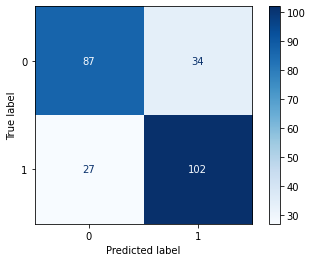

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(clf,X_test , y_test, cmap = plt.cm.Blues)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score: ',accuracy)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred,y_test)

0.756

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       114
           1       0.79      0.75      0.77       136

    accuracy                           0.76       250
   macro avg       0.75      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



### **Using Pickle to save the model**

In [96]:
#saving the model
import pickle

In [97]:
filename = 'reviews_classifier.sav'

In [98]:
pickle.dump(classifier, open(filename, 'wb'))

In [99]:
#saving the corpus

type(corpus)

list

In [100]:
with open('corpus.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(corpus, filehandle)

In [101]:
#to load the file
loaded_model = pickle.load(open('reviews_classifier.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.864
